In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv('ToyotaCorolla.csv')
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


<IPython.core.display.Javascript object>


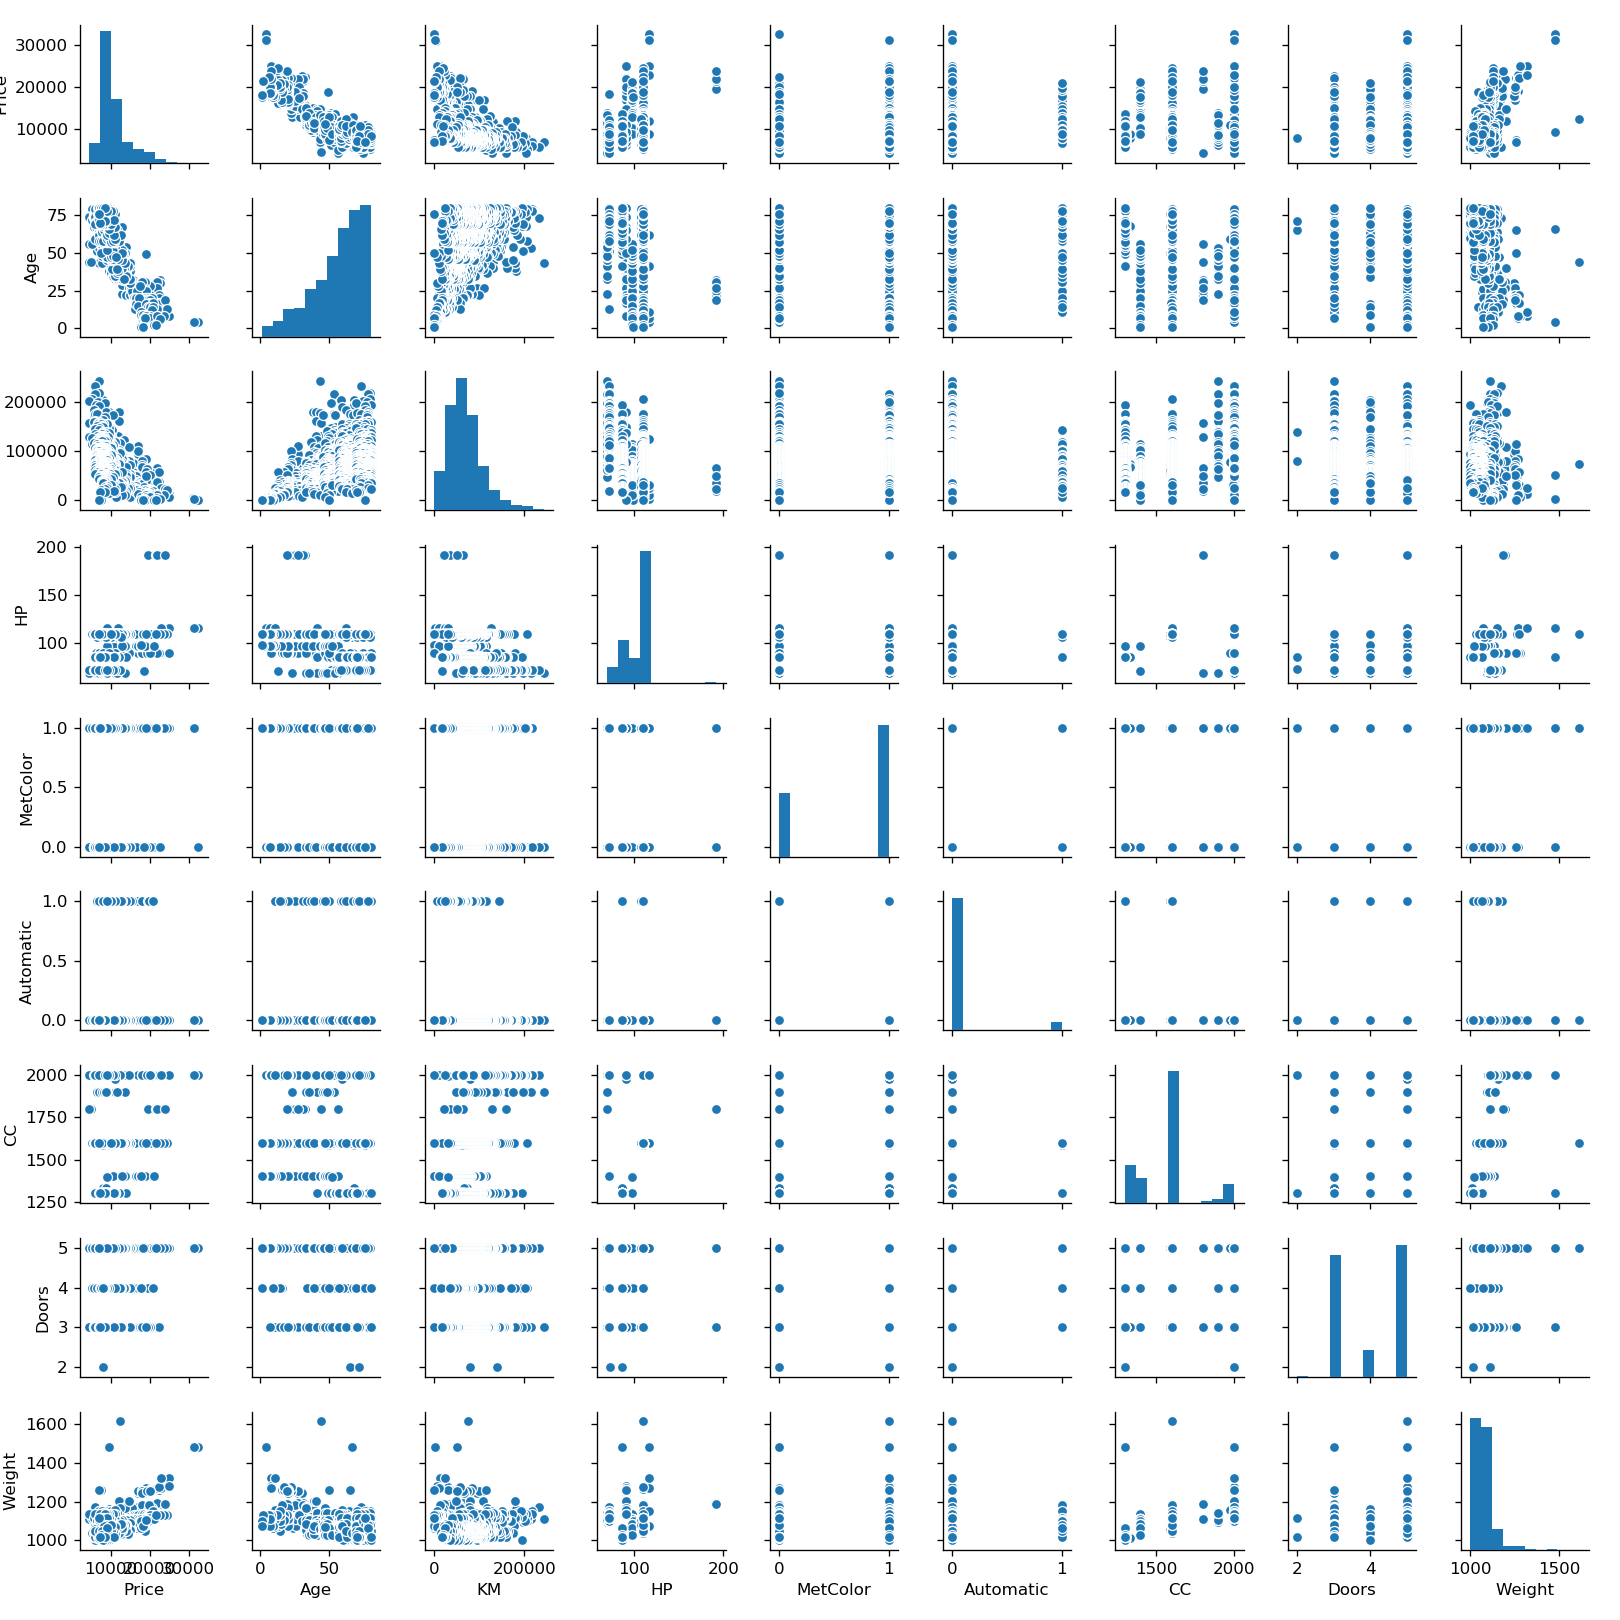

In [3]:
# Exploratory Data Analysis 
sns.pairplot(df, height = 1.5) 
# Transformation (MetColor, Automatic, Doors)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
Price        1436 non-null int64
Age          1436 non-null int64
KM           1436 non-null int64
FuelType     1436 non-null object
HP           1436 non-null int64
MetColor     1436 non-null int64
Automatic    1436 non-null int64
CC           1436 non-null int64
Doors        1436 non-null int64
Weight       1436 non-null int64
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [5]:
corr = df.drop(['FuelType'], axis=1).corr()  
corr

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.108905,0.033081,0.165067,0.185326,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.108150,0.031717,-0.133182,-0.148359,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.080503,-0.081854,0.302150,-0.036197,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.058712,0.013144,0.050884,0.092424,0.089614
MetColor,0.108905,-0.108150,-0.080503,0.058712,1.000000,-0.019335,0.034921,0.085243,0.057929
Automatic,0.033081,0.031717,-0.081854,0.013144,-0.019335,1.000000,-0.069321,-0.027654,0.057249
CC,0.165067,-0.133182,0.302150,0.050884,0.034921,-0.069321,1.000000,0.126768,0.651450
Doors,0.185326,-0.148359,-0.036197,0.092424,0.085243,-0.027654,0.126768,1.000000,0.302618
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057929,0.057249,0.651450,0.302618,1.000000


<IPython.core.display.Javascript object>


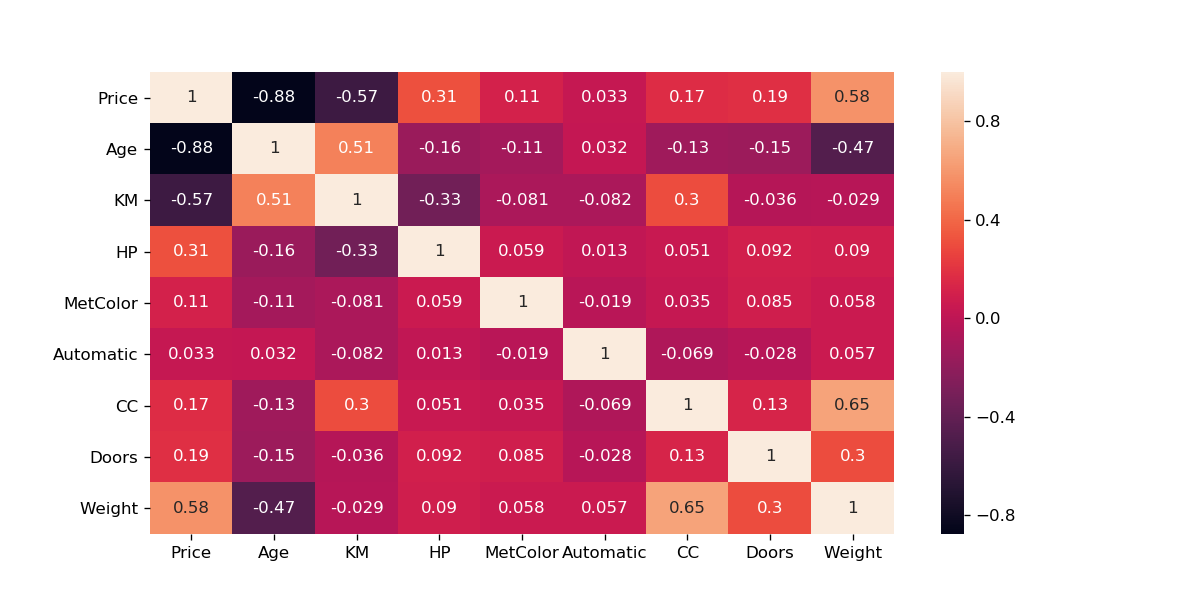

In [6]:
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True)  

In [7]:
#model = ols("Price ~ Age", df).fit()
#print(model.summary())

model = ols(formula='Price ~ Age', data = df)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4758.
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        09:43:00   Log-Likelihood:                -12756.
No. Observations:                1436   AIC:                         2.552e+04
Df Residuals:                    1434   BIC:                         2.553e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.029e+04    146.097    138.908      0.000       2e+04    2.06e+04
Age         -170.9336      2.478    -68.978      0.000    -175.795    -166.073
==============================================================================
Omnibus:                      359.275   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2774.226
Skew:                           0.946   Prob(JB):                         0.00
Kurtosis:                       9.541   Cond. No.                         187.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## In-sample prediction

In [8]:
ypred = fit.predict(df['Age'])

In [9]:
ypred.head()

0    16362.586194
1    16362.586194
2    16191.652609
3    15849.785439
4    15166.051099
dtype: float64

In [10]:
rmse = np.sqrt((sum((df['Price']-ypred)**2))/(df.shape[0]-1))

In [11]:
rmse

1745.429744926757

In [12]:
R2 = 1 - (sum((df['Price']-ypred)**2))/(sum((df['Price']-df['Price'].mean())**2))

In [13]:
R2

0.7684108996825318

<IPython.core.display.Javascript object>


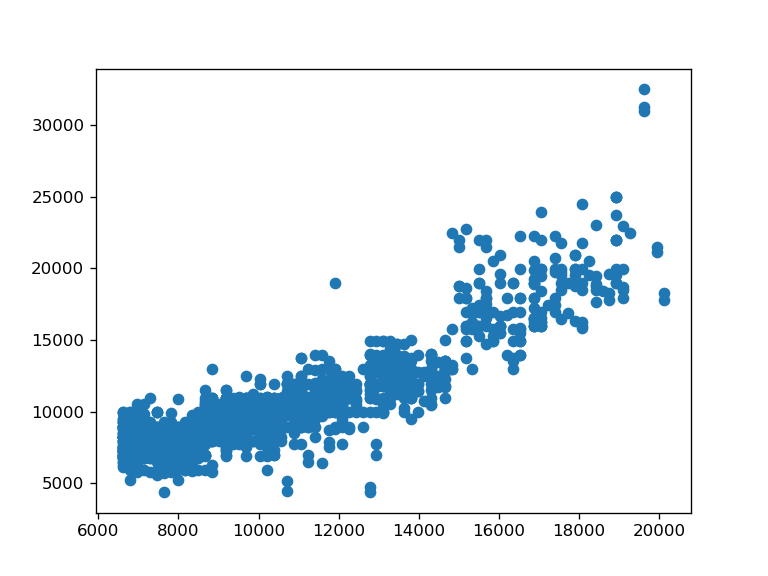

In [14]:
fig, ax = plt.subplots()
ax.plot(ypred, df['Price'], 'o', label="Data")

<IPython.core.display.Javascript object>


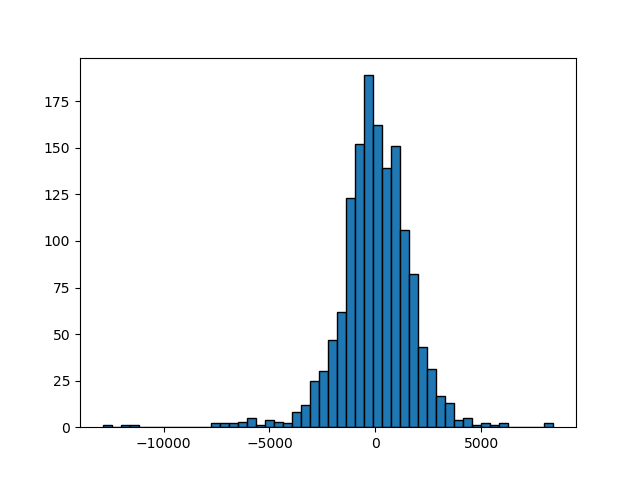

(array([  1.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   2.,   2.,   2.,   3.,   5.,   1.,   4.,   3.,   2.,   8.,
         12.,  25.,  30.,  47.,  62., 123., 152., 189., 162., 139., 151.,
        106.,  82.,  43.,  31.,  17.,  13.,   4.,   5.,   1.,   2.,   1.,
          2.,   0.,   0.,   0.,   0.,   2.]),
 array([-12889.67569114, -12463.42255915, -12037.16942716, -11610.91629517,
        -11184.66316318, -10758.41003119, -10332.1568992 ,  -9905.90376721,
         -9479.65063522,  -9053.39750322,  -8627.14437123,  -8200.89123924,
         -7774.63810725,  -7348.38497526,  -6922.13184327,  -6495.87871128,
         -6069.62557929,  -5643.3724473 ,  -5217.11931531,  -4790.86618332,
         -4364.61305133,  -3938.35991934,  -3512.10678734,  -3085.85365535,
         -2659.60052336,  -2233.34739137,  -1807.09425938,  -1380.84112739,
          -954.5879954 ,   -528.33486341,   -102.08173142,    324.17140057,
           750.42453256,   1176.67766455,   1602.9

In [22]:
fig, ax = plt.subplots()
ax.hist(ypred-df['Price'], edgecolor = 'black',bins = 50)
#plt.hist(ypred - df['Price'], color = 'blue', edgecolor = 'black',bins = int(180/5))

In [15]:
df.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.674791,0.055710,1566.827994,4.033426,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.468616,0.229441,187.182436,0.952677,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


<IPython.core.display.Javascript object>


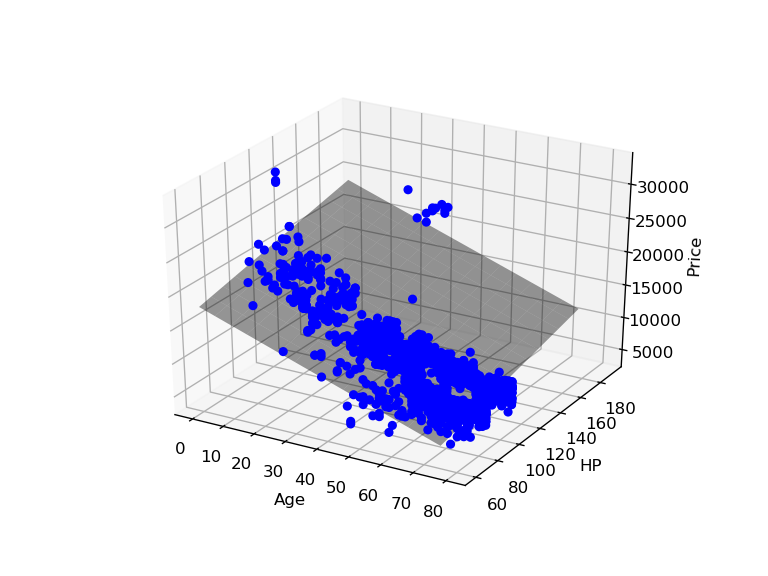

In [16]:
# 3d Plot - 2 variables Linear regression
from mpl_toolkits.mplot3d import Axes3D

model = ols(formula='Price ~ Age + HP', data = df)
fit = model.fit()
fit.summary()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 80, 5)                # generate a mesh
y_surf = np.arange(60, 200, 10)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'Age': x_surf.ravel(), 'HP': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.values.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)

ax.scatter(df['Age'], df['HP'], df['Price'],
           c='blue',
           marker='o',
           alpha=1)

ax.set_xlabel('Age')
ax.set_ylabel('HP')
ax.set_zlabel('Price')

plt.show()

# DONE

## TRAIN & TEST

In [17]:
# Add variable
#df['Age2'] = 1/df['Age']
#df['Age2'] = np.exp(-df['Age']/100)
df['Age2'] = df['Age']**2
y = df['Price']
x = df

In [18]:
# from sklearn.model_selection import train_test_split
# Random split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4,
                                                   random_state = 10)

In [19]:
df['Age2'].describe()

count    1436.000000
mean     3475.793872
std      1836.373082
min         1.000000
25%      1936.000000
50%      3721.000000
75%      4900.000000
max      6400.000000
Name: Age2, dtype: float64

In [20]:
model7 = ols(formula='Price ~ Age + KM + HP +CC+Weight+FuelType+Age2', data = x_train)
fit = model7.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     881.1
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        09:45:26   Log-Likelihood:                -7326.5
No. Observations:                 861   AIC:                         1.467e+04
Df Residuals:                     852   BIC:                         1.471e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1575.0790   1619.165      0.973      0.331   -1602.941    4753.099
FuelType[T.Diesel]  3709.4377    548.777      6.759      0.000    2632.325    4786.550
FuelType[T.Petrol]  1162.3274    365.662      3.179      0.002     444.623    1880.032
Age                 -239.6168     12.031    -19.917      0.000    -263.230    -216.003
KM                    -0.0164      0.002    -10.712      0.000      -0.019      -0.013
HP                    62.5172      5.950     10.507      0.000      50.839      74.196
CC                    -4.2427      0.602     -7.048      0.000      -5.424      -3.061
Weight                17.0994      1.399     12.220      0.000      14.353      19.846
Age2                   1.2136      0.114     10.631      0.000       0.990       1.438
==============================================================================
Omnibus:                      108.769   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              943.407
Skew:                          -0.181   Prob(JB):                    1.39e-205
Kurtosis:                       8.115   Cond. No.                     3.11e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
df['FuelType'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [22]:
# In-sample Evaluation
ypred = fit.predict(x_train)
rmse = np.sqrt((sum((y_train-ypred)**2))/(x_train.shape[0]-1))
rmse

1201.0517321329794

In [23]:
# Out-sample Evaluation
ypred = fit.predict(x_test)
rmse = np.sqrt((sum((y_test-ypred)**2))/(x_test.shape[0]-1))
rmse

1271.328273131857

In [24]:
R2 = 1 - (sum((y_test-ypred)**2))/(sum((y_test-y_test.mean())**2))
R2

0.8740884155341351

<IPython.core.display.Javascript object>


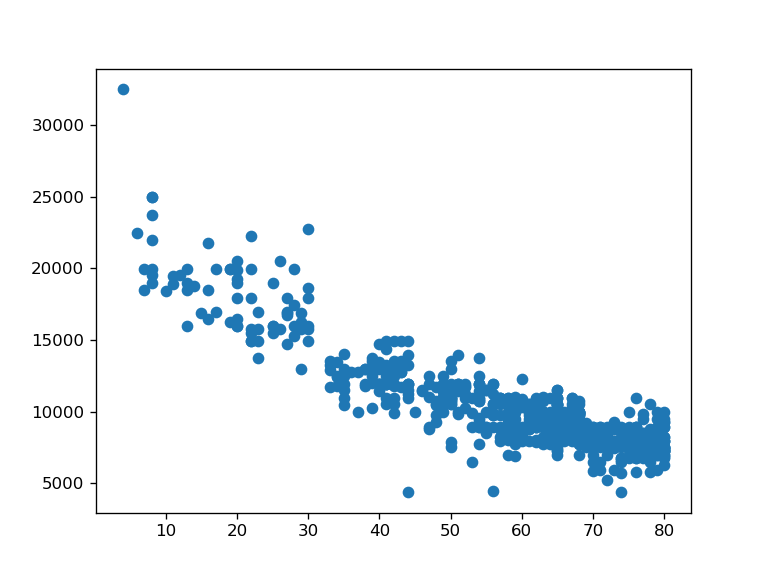

In [25]:
fig, ax = plt.subplots()
ax.plot(x_test['Age'], y_test, 'o', label="Data")